# Specific surface

© 2024 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

You can execute this notebook interactively →  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_mechanics/blob/main/notebooks/specific_surface.ipynb)  

In [1]:
import os
import subprocess
import textwrap
import itertools
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import colorcet as cc
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    subprocess.run('pip install ipympl', shell=True);
    from google.colab import output, files
    output.enable_custom_widget_manager()
else:
    import tkinter as tk
    from tkinter.filedialog import askopenfilename


# Figures setup
%matplotlib widget
# plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "DejaVu Serif",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

## Functions

In [2]:
def plot_grid_of_cubes(level, init_side=4):
    N = 2 ** level  # Calculate the number of cubes along each axis
    N_total = N ** 3  # Calculate the total number of cubes
    side_length = init_side / N  # Calculate the side length of each cube
    face_area = side_length ** 2   # Calculate the area of each face
    cube_area = 6 * face_area  # Calculate the area of the cube
    total_area = N_total * cube_area  # Calculate the total area of all the cubes
    cube_vol = side_length ** 3  # Calculate the volume of the cube
    total_vol = N_total * cube_vol  # Calculate the total volume of all the cubes
    
    # Calculate the gap between the cubes
    gap = 0.2 * side_length
    
    # Generate the x, y, z coordinates of the first corner of each cube
    coordinates = np.arange(0, N * side_length, side_length) + np.arange(0, N) * gap

    # Create the 3D plot
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Loop over each coordinate to draw the cubes
    for x, y, z in itertools.product(coordinates, repeat=3):
        # Define the vertices of the cube
        vertices = np.array([[x, y, z],
                             [x + side_length, y, z],
                             [x + side_length, y + side_length, z],
                             [x, y + side_length, z],
                             [x, y, z + side_length],
                             [x + side_length, y, z + side_length],
                             [x + side_length, y + side_length, z + side_length],
                             [x, y + side_length, z + side_length]])

        # Define the 6 faces of the cube
        faces = [[vertices[j] for j in [0, 1, 2, 3]],
                 [vertices[j] for j in [4, 5, 6, 7]], 
                 [vertices[j] for j in [0, 1, 5, 4]], 
                 [vertices[j] for j in [2, 3, 7, 6]], 
                 [vertices[j] for j in [0, 3, 7, 4]], 
                 [vertices[j] for j in [1, 2, 6, 5]]]
        
        # Plot the cube
        ax.add_collection3d(Poly3DCollection(faces, facecolors="#004488", linewidths=0.5, edgecolors='k', alpha=.5))

    max_x = max_y = max_z = max(coordinates) + side_length
    ax.set(xlabel='$x$', ylabel='$y$', zlabel='$z$', xlim=[0, max_x], ylim=[0, max_y], zlim=[0, max_z])
    
    # Set aspect equal
    ax.set_box_aspect([1, 1, 1])

    # Set the title
    ax.set_title('\n'.join([
        f'Number of cubes: {N_total} | Side length: {side_length:.5f} units',
        f'Total surf. area: {total_area:.2f} sq. units | Total volume: {total_vol:.2f} cubic units',
        f'Surf. area/Volume ratio: {total_area/total_vol:.2f}:1'
    ]))

    fig.canvas.header_visible = False
    fig.canvas.toolbar_position = 'bottom'
    plt.show()

def print_data(level, init_side=4):
    N = 2 ** level  # Calculate the number of cubes along each axis
    N_total = N ** 3  # Calculate the total number of cubes
    side_length = init_side / N  # Calculate the side length of each cube
    face_area = side_length ** 2   # Calculate the area of each face
    cube_area = 6 * face_area  # Calculate the area of the cube
    total_area = N_total * cube_area  # Calculate the total area of all the cubes
    cube_vol = side_length ** 3  # Calculate the volume of the cube
    total_vol = N_total * cube_vol  # Calculate the total volume of all the cubes
    
    print(('\n'.join([
        f'Number of cubes: {N_total} | Side length: {side_length:.5f} units',
        f'Total surf. area: {total_area:.2f} sq. units | Total volume: {total_vol:.2f} cubic units',
        f'Surf. area/Volume ratio: {total_area/total_vol:.2f}:1'
    ])))


## Example

A level higher than 6 will take moren than one minute to render the plot. Use the print_data function instead.

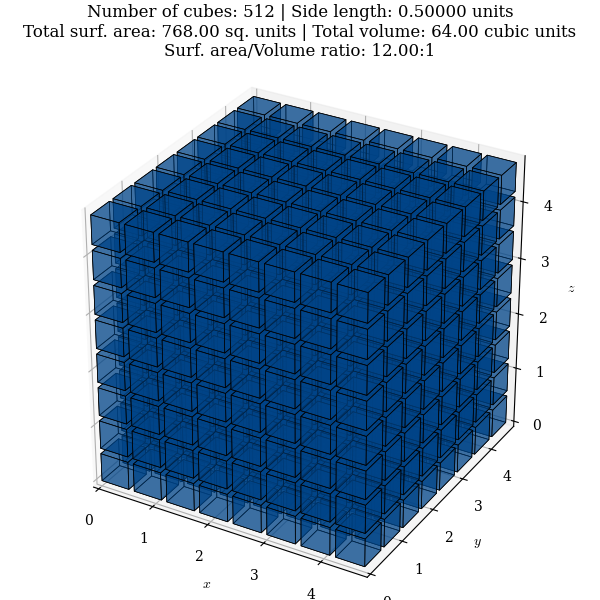

In [3]:
level = 3

plot_grid_of_cubes(level, init_side=4)

In [4]:
level = 10

print_data(level, init_side=4)

Number of cubes: 1073741824 | Side length: 0.00391 units
Total surf. area: 98304.00 sq. units | Total volume: 64.00 cubic units
Surf. area/Volume ratio: 1536.00:1
